In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Bu kısımda sadece yaş ve glukoz oranlarına bakarak kişinin hasta veya sağlıklı olduğunu buluyoruz

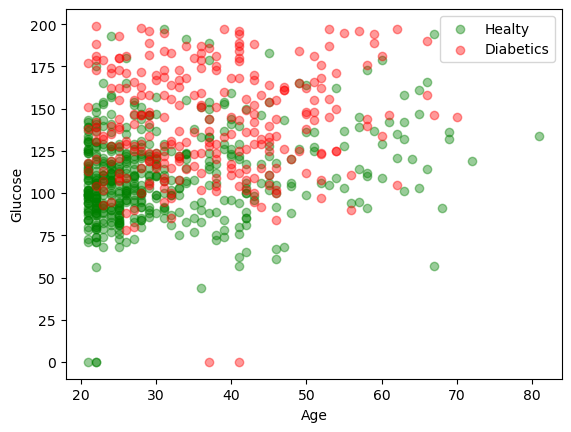

In [3]:
diabetics = data[data.Outcome == 1]
healty_people = data[data.Outcome == 0]

plt.scatter(healty_people.Age, healty_people.Glucose, color='green', label = 'Healty', alpha = 0.4)
plt.scatter(diabetics.Age, diabetics.Glucose, color='red', label = 'Diabetics', alpha = 0.4)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()

## X ve Y Eksenlerini Belirleme

In [11]:
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"], axis=1)

x = (x_raw_data - np.min(x_raw_data)) / (np.max(x_raw_data)-np.min(x_raw_data))

#Normalizaton yapıyoruz x_raw_data içerisindeki değerleri 0 ve 1 arasında olacak sekilde hepsini guncelliyoruz
#Eger bu sekilde normalization yapmazsak yüksek rakamlar küçük rakamları eze ve knn algoritmasını yanıltabilir
print("Normalization oncesi ham veriler:\n")
print(x_raw_data.head())

print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalization oncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

C:\Users\Talha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Talha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Talha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


## Train Test Ayırma

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

#KNN modelini oluşturuyoruz
knn =KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K = 3 için test verilerimizin dogrulama testi sonucu", knn.score(x_test, y_test))

K = 3 için test verilerimizin dogrulama testi sonucu 0.7857142857142857


Peki k kaç olmalı hangi durumda en fazla çıkar

In [21]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," ","Dogruluk oranı: %", knn_yeni.score(x_test, y_test)*100)
    sayac += 1

1   Dogruluk oranı: % 69.48051948051948
2   Dogruluk oranı: % 74.02597402597402
3   Dogruluk oranı: % 78.57142857142857
4   Dogruluk oranı: % 75.97402597402598
5   Dogruluk oranı: % 79.87012987012987
6   Dogruluk oranı: % 79.22077922077922
7   Dogruluk oranı: % 81.16883116883116
8   Dogruluk oranı: % 79.22077922077922
9   Dogruluk oranı: % 78.57142857142857
10   Dogruluk oranı: % 79.22077922077922
